<a href="https://colab.research.google.com/github/Paulovinicius212/ANALISES_REAIS_EXCEL/blob/main/ANALISE_REAL_EXCEL_VINIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISES REAIS P/EXCEL**




# ***Importar o CSV/EXCEL para o Google Colab***

In [59]:
from google.colab import files
uploaded = files.upload()


Saving VINIX_FINANÇAS (1).xlsx to VINIX_FINANÇAS (1).xlsx


# ***Carregar e Preparar os Dados***

# ***Carregar Todos os DataFrames***

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
file_path = '/content/VINIX_FINANÇAS (1).xlsx'

# Carregar as abas do Excel
df_servicos = pd.read_excel(file_path, sheet_name='Serviços')
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')
df_pendencias = pd.read_excel(file_path, sheet_name='Pendências')
df_fornecedores = pd.read_excel(file_path, sheet_name='Fornecedores')
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

# Verificar as primeiras linhas de cada DataFrame para garantir que foram carregados corretamente
print("Serviços:")
print(df_servicos.head())
print("\nEstoque:")
print(df_estoque.head())
print("\nPendências:")
print(df_pendencias.head())
print("\nFornecedores:")
print(df_fornecedores.head())
print("\nDespesas:")
print(df_despesas.head())


Serviços:
      ID   Marca_Veículos Placa_Veículos            Cliente  \
0  SER_1       FIAT/PALIO              *         CLIENTE 47   
1  SER_2      FIAT/STRADA              *   CLIENTE CAPANEMA   
2  SER_3  RENAULT/FLUENCE              *   CLIENTE CAPANEMA   
3  SER_4           VW/GOL              *     CLIENTE ESTIVA   
4  SER_5  FORD/FIESTA NEW              *  CLIENTE PEIXE-BOI   

                                  Descrição_Serviços Funcionário_Serviço  \
0         SERVIÇO DE TROCA DA CAIXA SUP. DO RADIADOR               PAULO   
1  SERVIÇO DE TROCA DAS DUAS CAIXAS DO RADIADOR M...               PAULO   
2                     SERVIÇO DE TROCA DO VENTILADOR               PAULO   
3         SERVIÇO DE TROCA DA CAIXA DO RADIADOR INF.               PAULO   
4                     SERVIÇO DE TROCA DO VENTILADOR               PAULO   

  Data_Serviço Horário_Serviço  Preço_Serviço Feedback  Meu_Lucro  
0   2024-09-03        10:00:00            200        *      100.0  
1   2024-09-03    

# ***2.1. Interface com ipywidgets***

In [73]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS (1).xlsx'
df_servicos = pd.read_excel(file_path, sheet_name='Serviços')
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')
df_pendencias = pd.read_excel(file_path, sheet_name='Pendências')
df_fornecedores = pd.read_excel(file_path, sheet_name='Fornecedores')
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

def mostrar_dados(sheet_name):
    if sheet_name == 'Serviços':
        display(df_servicos.head())
    elif sheet_name == 'Estoque':
        display(df_estoque.head())
    elif sheet_name == 'Pendências':
        display(df_pendencias.head())
    elif sheet_name == 'Fornecedores':
        display(df_fornecedores.head())
    elif sheet_name == 'Despesas':
        display(df_despesas.head())

# Criação dos widgets
dropdown = widgets.Dropdown(
    options=['Serviços', 'Estoque', 'Pendências', 'Fornecedores', 'Despesas'],
    value='Serviços',
    description='Escolha a Aba:',
)

# Conectar o widget a uma função
widgets.interactive(mostrar_dados, sheet_name=dropdown)


interactive(children=(Dropdown(description='Escolha a Aba:', options=('Serviços', 'Estoque', 'Pendências', 'Fo…

# **1. SERVIÇOS**

# ***Análise do Total de Serviços Prestados***

# ***analise de comissao bruta***

In [74]:
# Importando bibliotecas necessárias
import pandas as pd
import plotly.express as px

# Função para analisar valor bruto total
def analisar_valor_bruto(df):
    # Garantindo que 'Data_Serviço' esteja no formato de data
    df["Data_Serviço"] = pd.to_datetime(df["Data_Serviço"])

    # Adicionando colunas de Ano e Mês
    df["Ano"] = df["Data_Serviço"].dt.year
    df["Mês"] = df["Data_Serviço"].dt.month
    df["Nome_Mês"] = df["Data_Serviço"].dt.strftime('%B')  # Nome completo do mês

    # Calculando o valor bruto por mês e ano
    valor_bruto = df.groupby(["Ano", "Mês", "Nome_Mês"])["Preço_Serviço"].sum().reset_index()
    valor_bruto.rename(columns={"Preço_Serviço": "Valor Bruto"}, inplace=True)

    # Gráfico 1: Barras para valor bruto por mês
    fig_barras = px.bar(
        valor_bruto,
        x="Nome_Mês",
        y="Valor Bruto",
        color="Ano",
        title="Valor Bruto por Mês",
        labels={"Nome_Mês": "Mês", "Valor Bruto": "Valor Bruto (R$)", "Ano": "Ano"},
        text_auto=True,
        category_orders={"Nome_Mês": ['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December']}
    )

    # Gráfico 2: Linha mostrando a evolução do valor bruto por mês
    fig_linha = px.line(
        valor_bruto,
        x="Nome_Mês",
        y="Valor Bruto",
        color="Ano",
        title="Evolução do Valor Bruto por Mês",
        markers=True,
        labels={"Nome_Mês": "Mês", "Valor Bruto": "Valor Bruto (R$)", "Ano": "Ano"},
        category_orders={"Nome_Mês": ['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December']}
    )

    # Gráfico 3: Pizza mostrando a distribuição do valor bruto por mês
    fig_pizza = px.pie(
        valor_bruto,
        names="Nome_Mês",
        values="Valor Bruto",
        title="Distribuição do Valor Bruto por Mês",
        labels={"Nome_Mês": "Mês", "Valor Bruto": "Valor Bruto (R$)"}
    )

    # Exibindo os gráficos
    fig_barras.show()
    fig_linha.show()
    fig_pizza.show()

# Exemplo de como carregar os dados dinamicamente (substitua pelo caminho ou conexão real)
# Exemplo: df_servicos = pd.read_csv('seu_arquivo.csv')
# Para este caso, considere que o DataFrame já está carregado como 'df_servicos'

# Chamando a função para gerar os relatórios de valor bruto
analisar_valor_bruto(df_servicos)


# ***Analíse de ganho por periodo***

In [64]:
# Importando bibliotecas necessárias
import pandas as pd
import plotly.express as px

# Função para gerar relatórios detalhados
def gerar_relatorios_detalhados(df):
    # Garantindo que 'Data_Serviço' esteja no formato de data
    df["Data_Serviço"] = pd.to_datetime(df["Data_Serviço"])

    # Adicionando colunas de Ano e Mês
    df["Ano"] = df["Data_Serviço"].dt.year
    df["Mês"] = df["Data_Serviço"].dt.month
    df["Nome_Mês"] = df["Data_Serviço"].dt.strftime('%B')  # Nome completo do mês

    # Calculando ganhos anuais
    ganhos_anuais = df.groupby("Ano")["Meu_Lucro"].sum().reset_index()
    ganhos_anuais.rename(columns={"Meu_Lucro": "Ganhos Anuais"}, inplace=True)

    # Calculando ganhos mensais detalhados
    ganhos_mensais = df.groupby(["Ano", "Mês", "Nome_Mês"])["Meu_Lucro"].sum().reset_index()
    ganhos_mensais.rename(columns={"Meu_Lucro": "Ganhos Mensais"}, inplace=True)

    # Gráfico 1: Barras mensais detalhadas
    fig_barras = px.bar(
        ganhos_mensais,
        x="Nome_Mês",
        y="Ganhos Mensais",
        color="Ano",
        title="Ganhos Mensais Detalhados por Ano",
        labels={"Nome_Mês": "Mês", "Ganhos Mensais": "Lucro (R$)", "Ano": "Ano"},
        text_auto=True,
        category_orders={"Nome_Mês": ['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December']}
    )

    # Gráfico 2: Pizza de ganhos mensais
    fig_pizza = px.pie(
        ganhos_mensais,
        names="Nome_Mês",
        values="Ganhos Mensais",
        title="Proporção de Ganhos por Mês",
        labels={"Nome_Mês": "Mês", "Ganhos Mensais": "Lucro (R$)"}
    )

    # Gráfico 3: Área cumulativa para tendências mensais
    fig_area = px.area(
        ganhos_mensais,
        x="Mês",
        y="Ganhos Mensais",
        color="Ano",
        title="Tendência de Ganhos Mensais",
        labels={"Mês": "Mês", "Ganhos Mensais": "Lucro (R$)", "Ano": "Ano"},
        category_orders={"Mês": list(range(1, 13))}
    )

    # Exibindo os gráficos
    fig_barras.show()
    fig_pizza.show()
    fig_area.show()

# Exemplo de como carregar os dados dinamicamente (substitua pelo caminho ou conexão real)
# Exemplo: df_servicos = pd.read_csv('seu_arquivo.csv')
# Para este caso, considere que o DataFrame já está carregado como 'df_servicos'

# Chamando a função para gerar os relatórios detalhados
gerar_relatorios_detalhados(df_servicos)


# ***Quantidade de serviços por mês***

In [33]:
# Importando bibliotecas necessárias
import pandas as pd
import plotly.express as px

# Função para analisar quantidade de serviços
def analisar_quantidade_servicos(df):
    # Garantindo que 'Data_Serviço' esteja no formato de data
    df["Data_Serviço"] = pd.to_datetime(df["Data_Serviço"])

    # Adicionando colunas de Ano e Mês
    df["Ano"] = df["Data_Serviço"].dt.year
    df["Mês"] = df["Data_Serviço"].dt.month
    df["Nome_Mês"] = df["Data_Serviço"].dt.strftime('%B')  # Nome completo do mês

    # Contando a quantidade de serviços por mês e ano
    quantidade_servicos = df.groupby(["Ano", "Mês", "Nome_Mês"]).size().reset_index(name="Quantidade de Serviços")

    # Gráfico 1: Barras para quantidade de serviços por mês
    fig_barras = px.bar(
        quantidade_servicos,
        x="Nome_Mês",
        y="Quantidade de Serviços",
        color="Ano",
        title="Quantidade de Serviços Realizados por Mês",
        labels={"Nome_Mês": "Mês", "Quantidade de Serviços": "Quantidade", "Ano": "Ano"},
        text_auto=True,
        category_orders={"Nome_Mês": ['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December']}
    )

    # Gráfico 2: Linha mostrando a evolução da quantidade de serviços por mês
    fig_linha = px.line(
        quantidade_servicos,
        x="Nome_Mês",
        y="Quantidade de Serviços",
        color="Ano",
        title="Evolução da Quantidade de Serviços Realizados",
        markers=True,
        labels={"Nome_Mês": "Mês", "Quantidade de Serviços": "Quantidade", "Ano": "Ano"},
        category_orders={"Nome_Mês": ['January', 'February', 'March', 'April', 'May', 'June',
                                      'July', 'August', 'September', 'October', 'November', 'December']}
    )

    # Gráfico 3: Pizza mostrando a distribuição da quantidade de serviços por mês
    fig_pizza = px.pie(
        quantidade_servicos,
        names="Nome_Mês",
        values="Quantidade de Serviços",
        title="Distribuição de Serviços por Mês",
        labels={"Nome_Mês": "Mês", "Quantidade de Serviços": "Quantidade"}
    )

    # Exibindo os gráficos
    fig_barras.show()
    fig_linha.show()
    fig_pizza.show()

# Exemplo de como carregar os dados dinamicamente (substitua pelo caminho ou conexão real)
# Exemplo: df_servicos = pd.read_csv('seu_arquivo.csv')
# Para este caso, considere que o DataFrame já está carregado como 'df_servicos'

# Chamando a função para gerar os relatórios
analisar_quantidade_servicos(df_servicos)


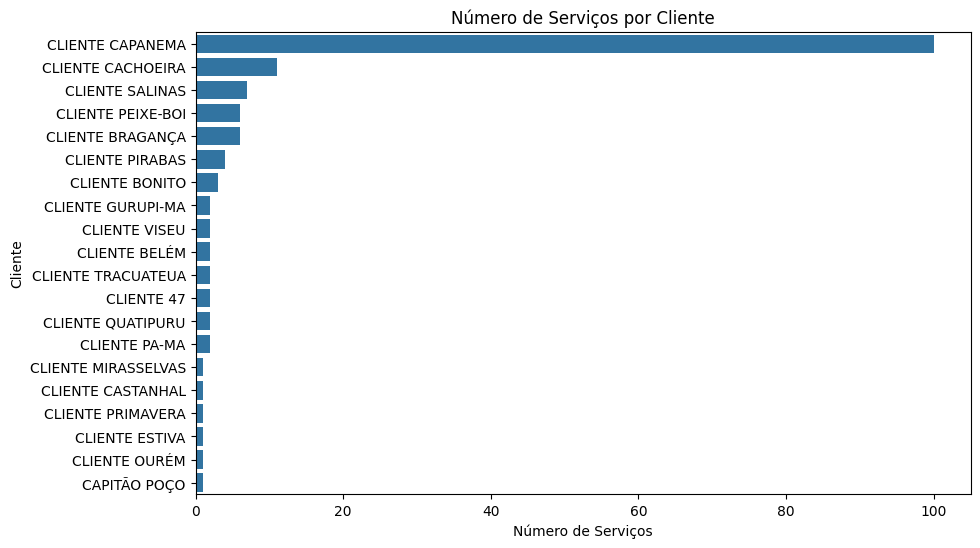

In [65]:
# Serviços por cliente
plt.figure(figsize=(10, 6))
sns.countplot(y='Cliente', data=df_servicos, order=df_servicos['Cliente'].value_counts().index)
plt.title('Número de Serviços por Cliente')
plt.xlabel('Número de Serviços')
plt.ylabel('Cliente')
plt.show()

# ***Lucro por Serviço***

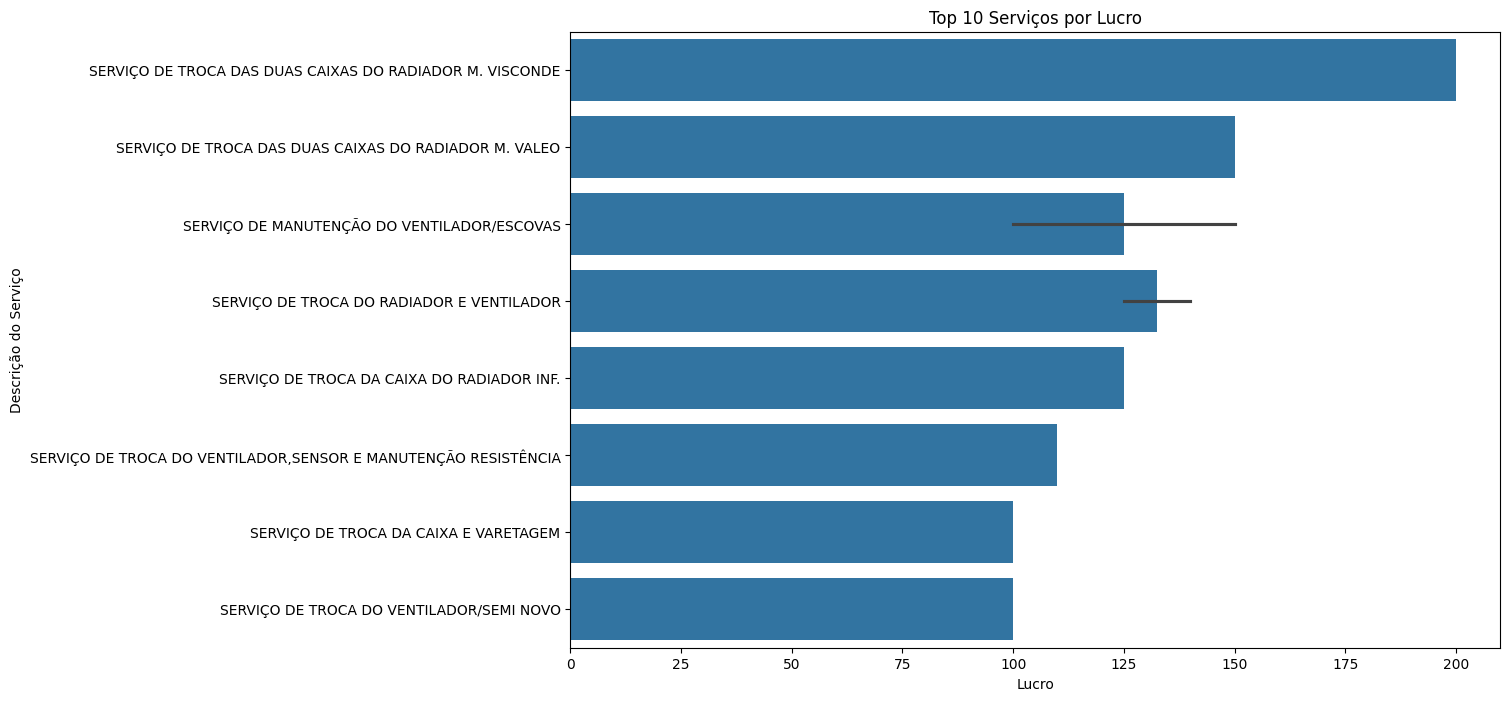

In [66]:
# Garantir que 'Meu_Lucro' é numérico
df_servicos['Meu_Lucro'] = pd.to_numeric(df_servicos['Meu_Lucro'], errors='coerce')

# Analisar lucro por serviço
lucro_por_servico = df_servicos[['Descrição_Serviços', 'Meu_Lucro']].sort_values(by='Meu_Lucro', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Meu_Lucro', y='Descrição_Serviços', data=lucro_por_servico.head(10))
plt.title('Top 10 Serviços por Lucro')
plt.xlabel('Lucro')
plt.ylabel('Descrição do Serviço')
plt.show()


# ***Investimento Total***

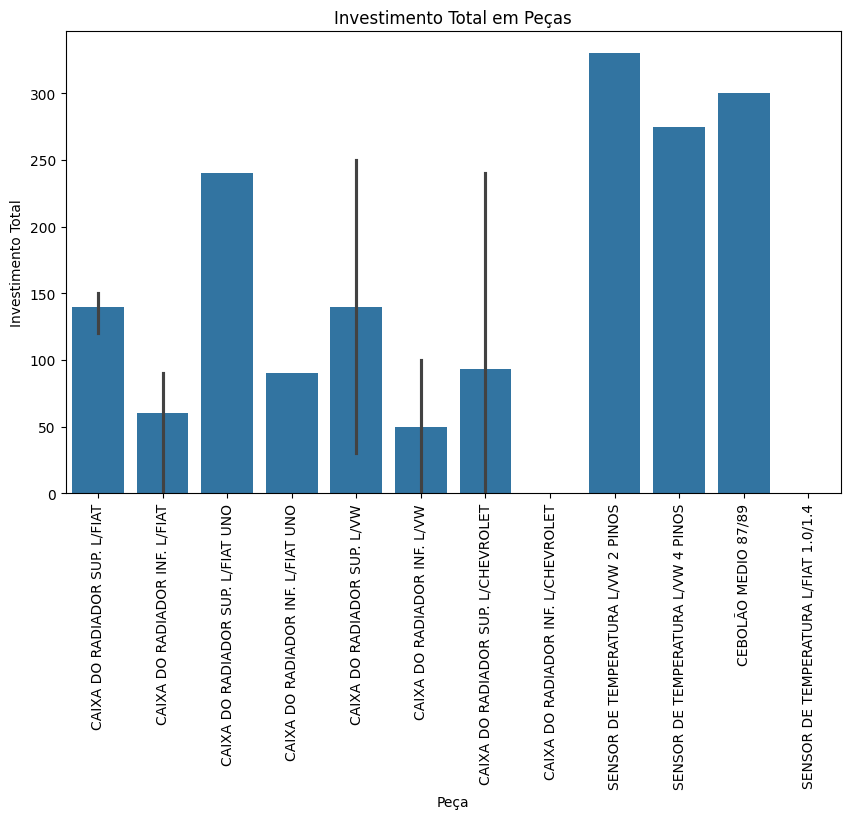

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar investimento total
plt.figure(figsize=(10, 6))
sns.barplot(x='Peças', y='Investimento_total', data=df_estoque)
plt.title('Investimento Total em Peças')
plt.xlabel('Peça')
plt.ylabel('Investimento Total')
plt.xticks(rotation=90)  # Ajusta a rotação dos rótulos do eixo x
plt.show()

# ***Distribuição de Preços dos Serviços***

In [68]:
# Importando a biblioteca pandas (se necessário)
import pandas as pd

# Exemplo de DataFrame (df_servicos) contendo a coluna 'Preço_Serviço'
# Caso já tenha o DataFrame, você pode pular essa parte.
dados = {'Preço_Serviço': [100, 150, 200, 120, 180]}
df_servicos = pd.DataFrame(dados)

# Estatísticas descritivas dos preços dos serviços
preco_servico_descricao = df_servicos['Preço_Serviço'].describe()

# Formatando para remover decimais extras e traduzindo os rótulos
print("\nDistribuição dos Preços dos Serviços:")
print(f"Contagem: {int(preco_servico_descricao['count'])}")
print(f"Média: {preco_servico_descricao['mean']:.0f}")
print(f"Desvio padrão: {preco_servico_descricao['std']:.0f}")
print(f"Valor mínimo: {preco_servico_descricao['min']:.0f}")
print(f"1º quartil (25%): {preco_servico_descricao['25%']:.0f}")
print(f"Mediana (50%): {preco_servico_descricao['50%']:.0f}")
print(f"3º quartil (75%): {preco_servico_descricao['75%']:.0f}")
print(f"Valor máximo: {preco_servico_descricao['max']:.0f}")



Distribuição dos Preços dos Serviços:
Contagem: 5
Média: 150
Desvio padrão: 41
Valor mínimo: 100
1º quartil (25%): 120
Mediana (50%): 150
3º quartil (75%): 180
Valor máximo: 200


# ***Quantidade de Serviços por Marca de Veículos***

Nomes das colunas antes da correção:
Index(['ID', 'Marca_Veículos', 'Placa_Veículos', 'Cliente',
       'Descrição_Serviços', 'Funcionário_Serviço', 'Data_Serviço',
       'Horário_Serviço', 'Preço_Serviço', 'Feedback', 'Meu_Lucro', 'Ano_Mes'],
      dtype='object')
Nomes das colunas após a correção:
Index(['ID', 'Marca_Veículos', 'Placa_Veículos', 'Cliente',
       'Descrição_Serviços', 'Funcionário_Serviço', 'Data_Serviço',
       'Horário_Serviço', 'Preço_Serviço', 'Feedback', 'Meu_Lucro', 'Ano_Mes'],
      dtype='object')


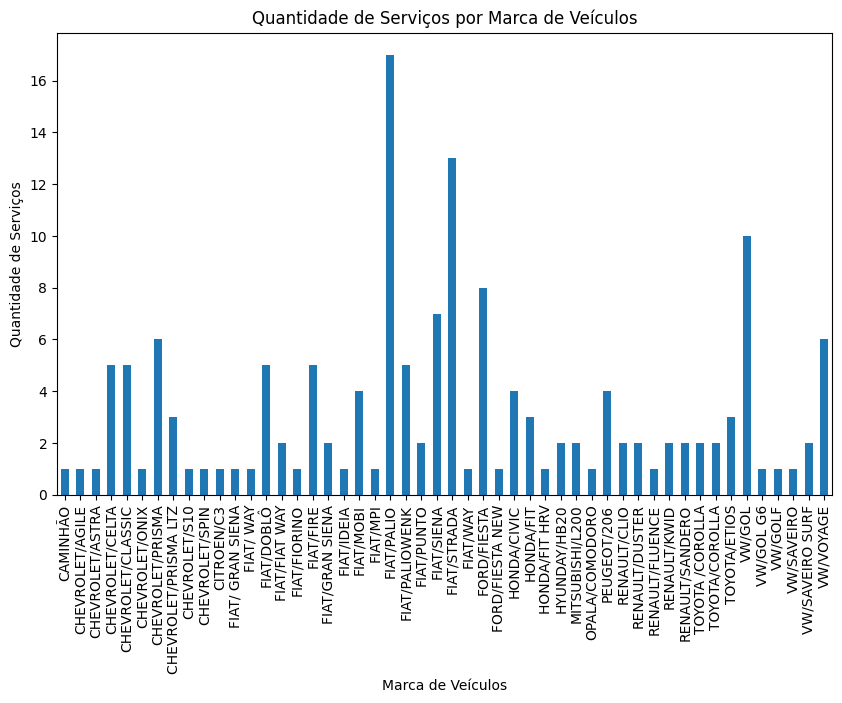

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataframe (certifique-se de que já tenha carregado o df_servicos corretamente)
# df_servicos = pd.read_excel(file_path, sheet_name='Serviços')

# 1. Verificar os nomes das colunas
print("Nomes das colunas antes da correção:")
print(df_servicos.columns)

# 2. Remover espaços extras nos nomes das colunas (caso existam)
df_servicos.columns = df_servicos.columns.str.strip()

# 3. Verificar os nomes das colunas novamente após remover os espaços extras
print("Nomes das colunas após a correção:")
print(df_servicos.columns)

# 4. Criar o gráfico de barras para a quantidade de serviços por marca de veículos
try:
    df_servicos.groupby('Marca_Veículos').size().plot(kind='bar', figsize=(10,6))
    plt.title('Quantidade de Serviços por Marca de Veículos')
    plt.xlabel('Marca de Veículos')
    plt.ylabel('Quantidade de Serviços')
    plt.show()
except KeyError as e:
    print(f"Erro: Coluna '{e}' não encontrada no dataframe.")


# ***Gráfico de linha: Lucro ao longo do tempo***

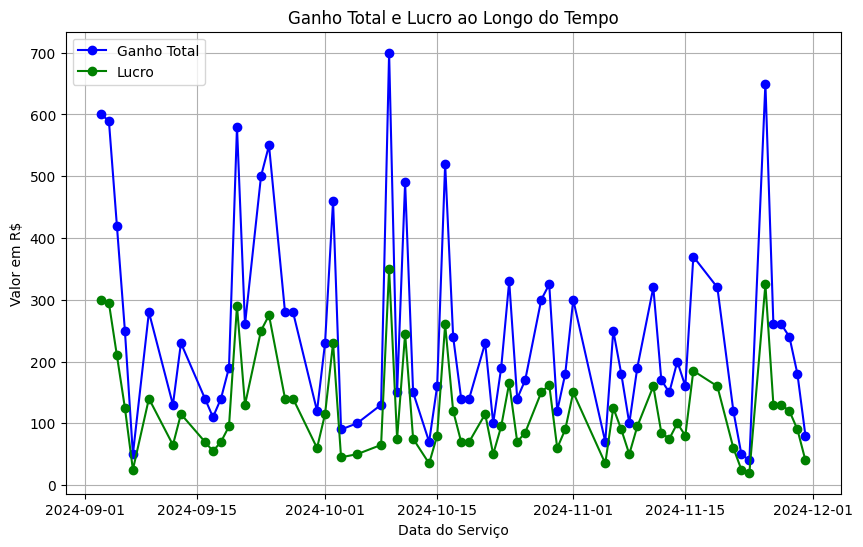

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel diretamente do caminho fornecido
arquivo_excel = '/content/VINIX_FINANÇAS (1).xlsx'

# Ler a planilha desejada dentro do arquivo Excel
df_servicos = pd.read_excel(arquivo_excel, sheet_name='Serviços')  # Substitua pelo nome da aba correta

# Certificar-se de que a coluna Data_Serviço está no formato datetime
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'], errors='coerce')

# Converter as colunas 'Preço_Serviço' e 'Meu_Lucro' para valores numéricos
df_servicos['Preço_Serviço'] = pd.to_numeric(df_servicos['Preço_Serviço'], errors='coerce')
df_servicos['Meu_Lucro'] = pd.to_numeric(df_servicos['Meu_Lucro'], errors='coerce')

# Remover linhas com dados inválidos (NaT ou NaN)
df_servicos = df_servicos.dropna(subset=['Data_Serviço', 'Preço_Serviço', 'Meu_Lucro'])

# Agrupar os dados por Data_Serviço para calcular os totais de ganhos e lucros por dia
ganhos_e_lucro = df_servicos.groupby('Data_Serviço').agg({'Preço_Serviço': 'sum', 'Meu_Lucro': 'sum'})

# Plotar o gráfico de ganhos e lucros ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(ganhos_e_lucro.index, ganhos_e_lucro['Preço_Serviço'], label='Ganho Total', color='blue', marker='o')
plt.plot(ganhos_e_lucro.index, ganhos_e_lucro['Meu_Lucro'], label='Lucro', color='green', marker='o')
plt.title('Ganho Total e Lucro ao Longo do Tempo')
plt.xlabel('Data do Serviço')
plt.ylabel('Valor em R$')
plt.grid(True)
plt.legend()
plt.show()


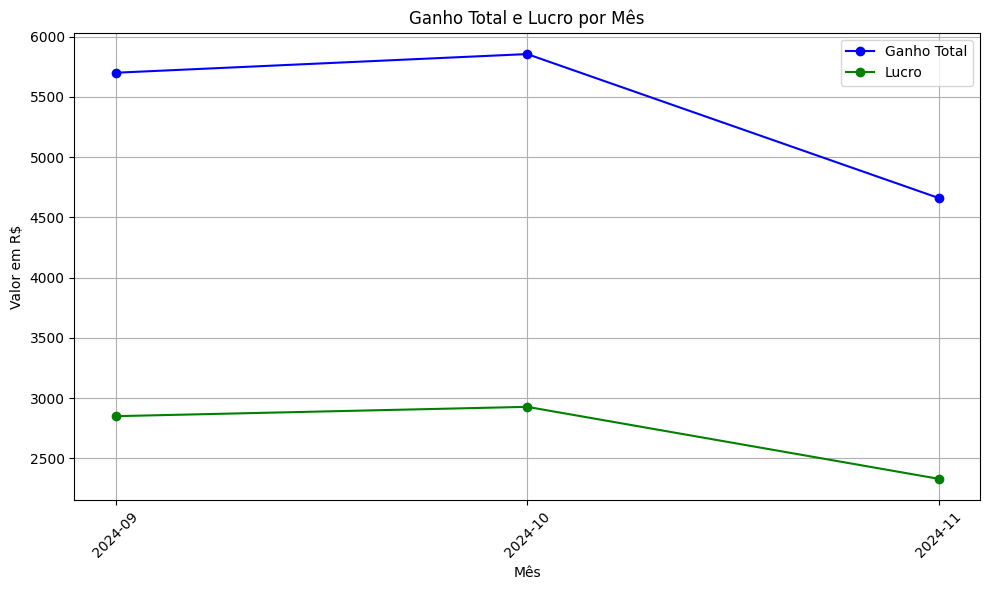

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel diretamente do caminho fornecido
arquivo_excel = '/content/VINIX_FINANÇAS (1).xlsx'

# Ler a planilha desejada dentro do arquivo Excel
df_servicos = pd.read_excel(arquivo_excel, sheet_name='Serviços')  # Substitua pelo nome da aba correta

# Certificar-se de que a coluna Data_Serviço está no formato datetime
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'], errors='coerce')

# Converter as colunas 'Preço_Serviço' e 'Meu_Lucro' para valores numéricos
df_servicos['Preço_Serviço'] = pd.to_numeric(df_servicos['Preço_Serviço'], errors='coerce')
df_servicos['Meu_Lucro'] = pd.to_numeric(df_servicos['Meu_Lucro'], errors='coerce')

# Remover linhas com dados inválidos (NaT ou NaN)
df_servicos = df_servicos.dropna(subset=['Data_Serviço', 'Preço_Serviço', 'Meu_Lucro'])

# Agrupar os dados por mês e calcular os totais de ganhos e lucros
df_servicos['Ano_Mes'] = df_servicos['Data_Serviço'].dt.to_period('M')  # Extrair ano e mês
ganhos_e_lucro_mensal = df_servicos.groupby('Ano_Mes').agg({'Preço_Serviço': 'sum', 'Meu_Lucro': 'sum'})

# Plotar o gráfico de ganhos e lucros ao longo dos meses
plt.figure(figsize=(10, 6))
plt.plot(ganhos_e_lucro_mensal.index.astype(str), ganhos_e_lucro_mensal['Preço_Serviço'], label='Ganho Total', color='blue', marker='o')
plt.plot(ganhos_e_lucro_mensal.index.astype(str), ganhos_e_lucro_mensal['Meu_Lucro'], label='Lucro', color='green', marker='o')
plt.title('Ganho Total e Lucro por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor em R$')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para melhor visualização
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


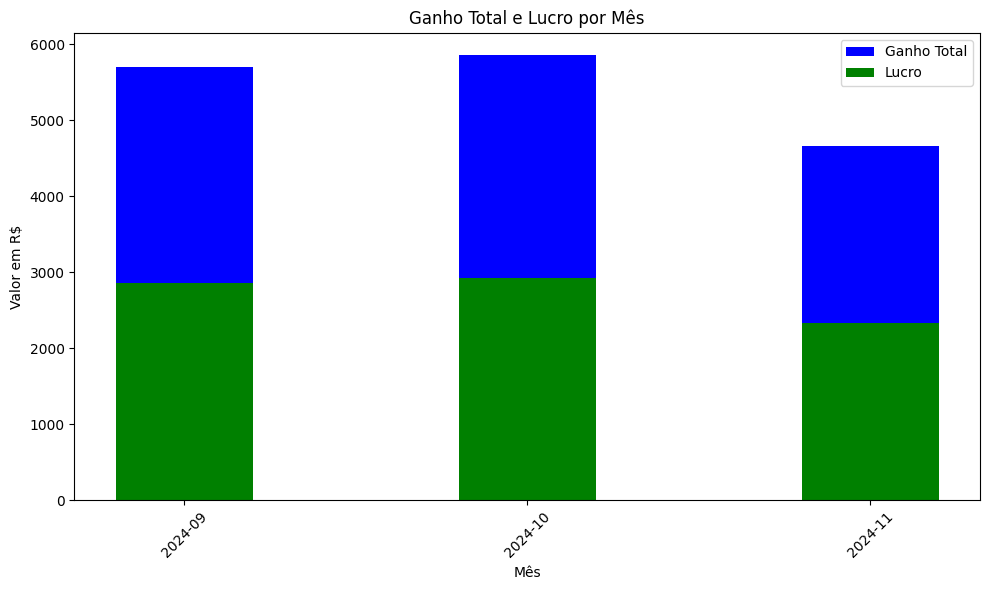

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel diretamente do caminho fornecido
arquivo_excel = '/content/VINIX_FINANÇAS (1).xlsx'

# Ler a planilha desejada dentro do arquivo Excel
df_servicos = pd.read_excel(arquivo_excel, sheet_name='Serviços')  # Substitua pelo nome da aba correta

# Certificar-se de que a coluna Data_Serviço está no formato datetime
df_servicos['Data_Serviço'] = pd.to_datetime(df_servicos['Data_Serviço'], errors='coerce')

# Converter as colunas 'Preço_Serviço' e 'Meu_Lucro' para valores numéricos
df_servicos['Preço_Serviço'] = pd.to_numeric(df_servicos['Preço_Serviço'], errors='coerce')
df_servicos['Meu_Lucro'] = pd.to_numeric(df_servicos['Meu_Lucro'], errors='coerce')

# Remover linhas com dados inválidos (NaT ou NaN)
df_servicos = df_servicos.dropna(subset=['Data_Serviço', 'Preço_Serviço', 'Meu_Lucro'])

# Agrupar os dados por mês e calcular os totais de ganhos e lucros
df_servicos['Ano_Mes'] = df_servicos['Data_Serviço'].dt.to_period('M')  # Extrair ano e mês
ganhos_e_lucro_mensal = df_servicos.groupby('Ano_Mes').agg({'Preço_Serviço': 'sum', 'Meu_Lucro': 'sum'})

# Plotar o gráfico de barras verticais de ganhos e lucros ao longo dos meses
plt.figure(figsize=(10, 6))

# Plotando o Ganho Total
plt.bar(ganhos_e_lucro_mensal.index.astype(str), ganhos_e_lucro_mensal['Preço_Serviço'], label='Ganho Total', color='blue', width=0.4)

# Plotando o Lucro por cima das barras de Ganho Total
plt.bar(ganhos_e_lucro_mensal.index.astype(str), ganhos_e_lucro_mensal['Meu_Lucro'], label='Lucro', color='green', width=0.4)

plt.title('Ganho Total e Lucro por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor em R$')

# Remover limites do eixo Y
plt.ylim(bottom=0)

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Mostrar a legenda
plt.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


# ***Gráfico de pizza: Distribuição de serviços por funcionário***

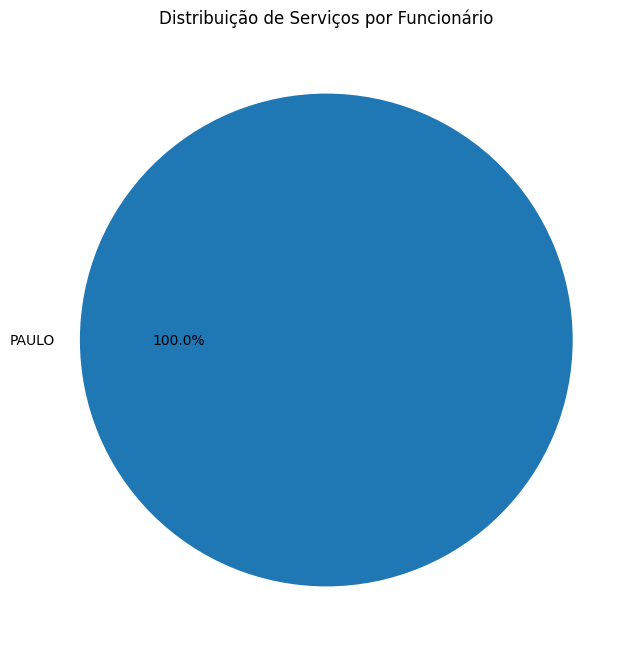

In [83]:
df_servicos.groupby('Funcionário_Serviço').size().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Distribuição de Serviços por Funcionário')
plt.show()


# ***Gráfico de barras: Preço médio por tipo de serviço***

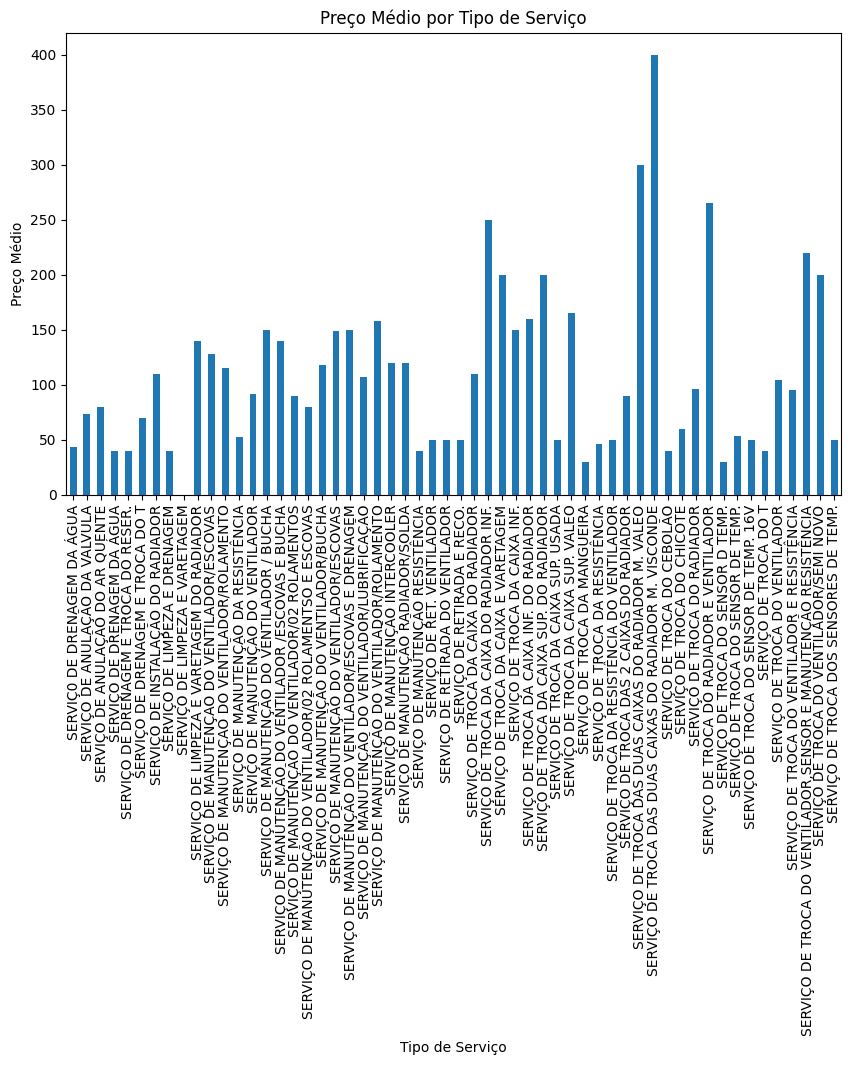

In [84]:
df_servicos.groupby('Descrição_Serviços')['Preço_Serviço'].mean().plot(kind='bar', figsize=(10,6))
plt.title('Preço Médio por Tipo de Serviço')
plt.xlabel('Tipo de Serviço')
plt.ylabel('Preço Médio')
plt.show()


# ***Gráfico de dispersão: Preço do serviço vs Lucro***

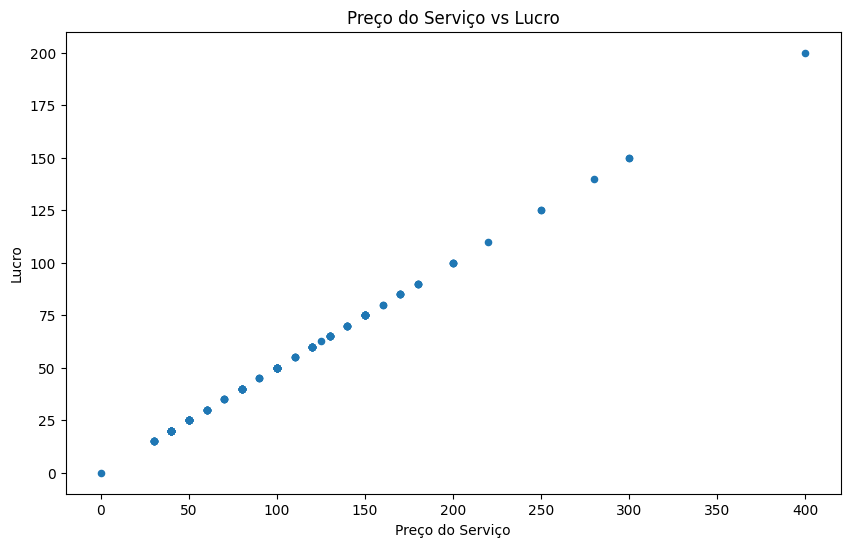

In [85]:
df_servicos.plot(kind='scatter', x='Preço_Serviço', y='Meu_Lucro', figsize=(10,6))
plt.title('Preço do Serviço vs Lucro')
plt.xlabel('Preço do Serviço')
plt.ylabel('Lucro')
plt.show()


# **2. ESTOQUE**

# ***Resumo das Quantidades de Peças***

In [86]:
# Estatísticas descritivas das quantidades de peças
quantidade_pecas_descricao = df_estoque['Quantidade_Peças'].describe()


# Formatando para remover decimais extras e traduzindo os rótulos
print("\nDistribuição das Quantidades de Peças:")
print(f"Contagem: {int(quantidade_pecas_descricao['count'])}")
print(f"Média: {quantidade_pecas_descricao['mean']:.0f}")
print(f"Desvio padrão: {quantidade_pecas_descricao['std']:.0f}")
print(f"Valor mínimo: {quantidade_pecas_descricao['min']:.0f}")
print(f"1º quartil (25%): {quantidade_pecas_descricao['25%']:.0f}")
print(f"Mediana (50%): {quantidade_pecas_descricao['50%']:.0f}")
print(f"3º quartil (75%): {quantidade_pecas_descricao['75%']:.0f}")
print(f"Valor máximo: {quantidade_pecas_descricao['max']:.0f}")


Distribuição das Quantidades de Peças:
Contagem: 22
Média: 3
Desvio padrão: 3
Valor mínimo: 0
1º quartil (25%): 0
Mediana (50%): 3
3º quartil (75%): 5
Valor máximo: 8


# ***Análise do Custo Médio das Peças***

In [87]:
# Estatísticas descritivas dos preços unitários
preco_unitario_in_descricao = df_estoque['Preço_Unitário_in'].describe()
preco_unitario_fin_descricao = df_estoque['Preço_Unitário_fin'].describe()


# Formatando para remover decimais extras e traduzindo os rótulos
print("\nDistribuição das Quantidades de Peças de entrada:")
print(f"Contagem: {int(preco_unitario_in_descricao['count'])}")
print(f"Média: {preco_unitario_in_descricao['mean']:.0f}")
print(f"Desvio padrão: {preco_unitario_in_descricao['std']:.0f}")
print(f"Valor mínimo: {preco_unitario_in_descricao['min']:.0f}")
print(f"1º quartil (25%): {preco_unitario_in_descricao['25%']:.0f}")
print(f"Mediana (50%): {preco_unitario_in_descricao['50%']:.0f}")
print(f"3º quartil (75%): {preco_unitario_in_descricao['75%']:.0f}")
print(f"Valor máximo: {preco_unitario_in_descricao['max']:.0f}")



# Formatando para remover decimais extras e traduzindo os rótulos
print("\nDistribuição das Quantidades de Peças de saida:")
print(f"Contagem: {int(preco_unitario_fin_descricao['count'])}")
print(f"Média: {preco_unitario_fin_descricao['mean']:.0f}")
print(f"Desvio padrão: {preco_unitario_fin_descricao['std']:.0f}")
print(f"Valor mínimo: {preco_unitario_fin_descricao['min']:.0f}")
print(f"1º quartil (25%): {preco_unitario_fin_descricao['25%']:.0f}")
print(f"Mediana (50%): {preco_unitario_fin_descricao['50%']:.0f}")
print(f"3º quartil (75%): {preco_unitario_fin_descricao['75%']:.0f}")
print(f"Valor máximo: {preco_unitario_fin_descricao['max']:.0f}")




Distribuição das Quantidades de Peças de entrada:
Contagem: 22
Média: 38
Desvio padrão: 10
Valor mínimo: 30
1º quartil (25%): 30
Mediana (50%): 30
3º quartil (75%): 48
Valor máximo: 60

Distribuição das Quantidades de Peças de saida:
Contagem: 22
Média: 110
Desvio padrão: 16
Valor mínimo: 90
1º quartil (25%): 100
Mediana (50%): 100
3º quartil (75%): 120
Valor máximo: 150


# ***Inventário Atual***

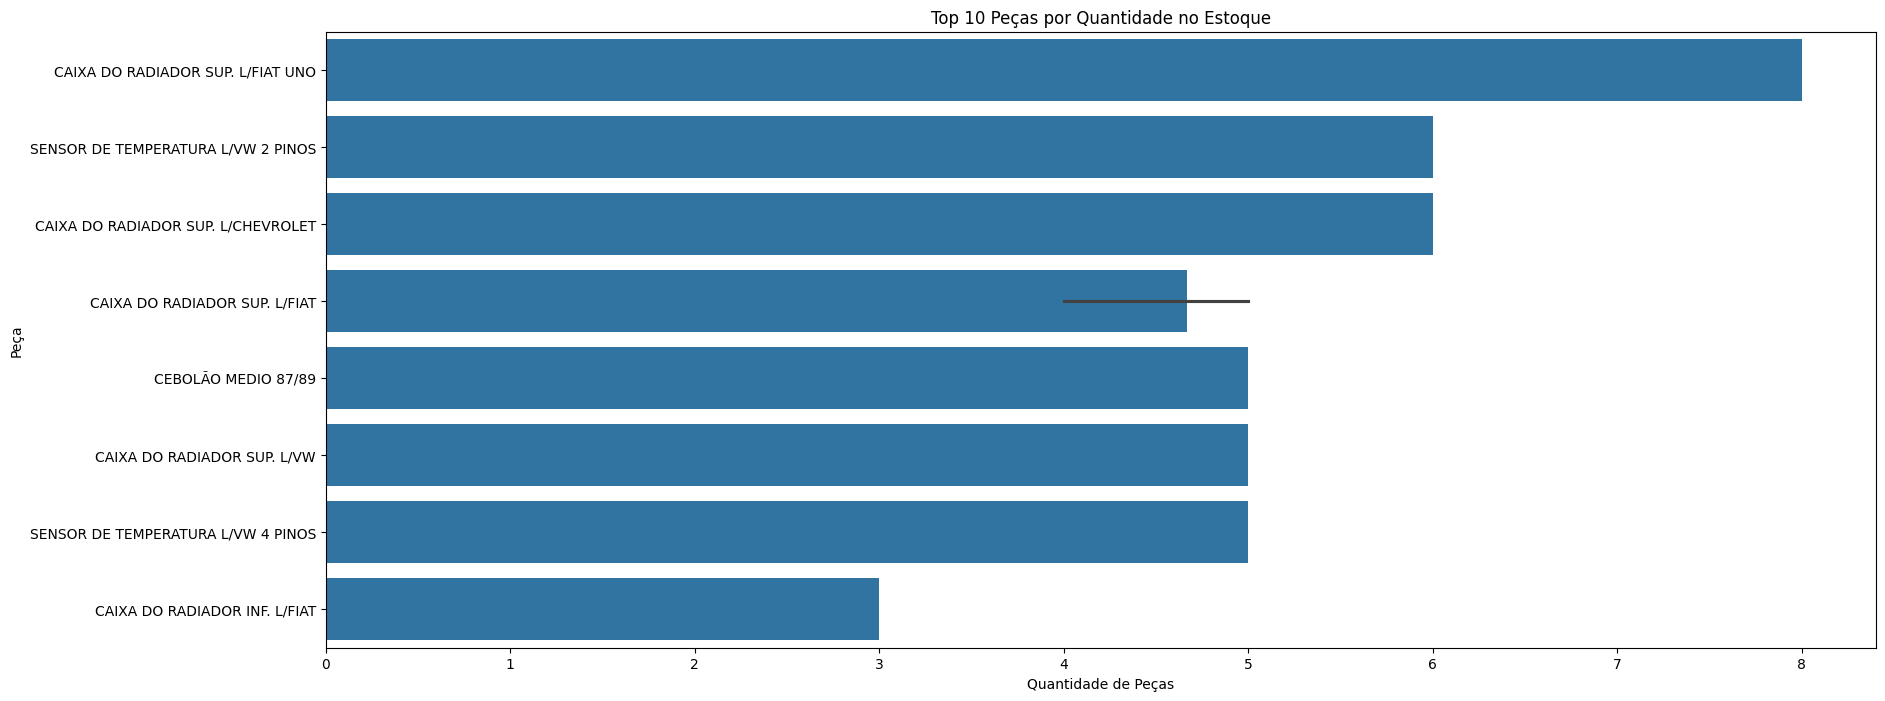

In [88]:
# Inventário atual
plt.figure(figsize=(20, 8))
sns.barplot(x='Quantidade_Peças', y='Peças', data=df_estoque.sort_values(by='Quantidade_Peças', ascending=False).head(10))
plt.title('Top 10 Peças por Quantidade no Estoque')
plt.xlabel('Quantidade de Peças')
plt.ylabel('Peça')
plt.show()


# ***Lucro e Ganho Líquido***

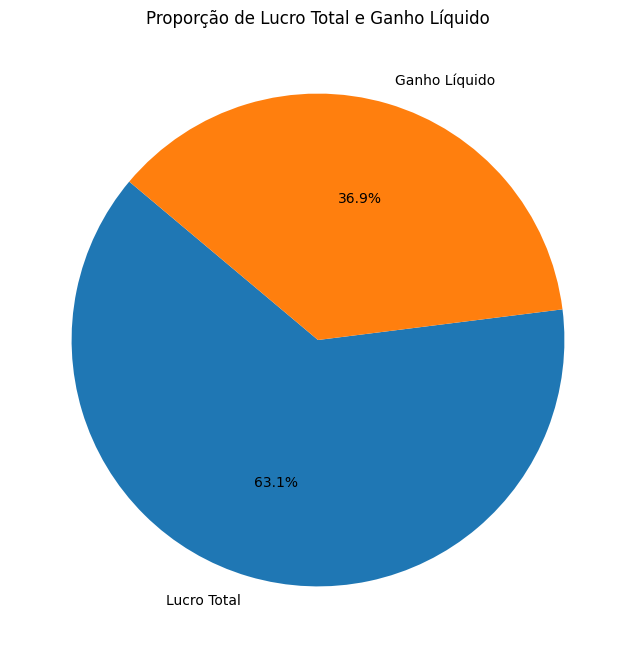

In [89]:
# Garantir que 'Lucro_Total' e 'Ganho_liquido' são numéricos
df_estoque['Lucro_Total'] = pd.to_numeric(df_estoque['Lucro_Total'], errors='coerce')
df_estoque['Ganho_liquido'] = pd.to_numeric(df_estoque['Ganho_liquido'], errors='coerce')

# Analisar lucro e ganho líquido
total_lucro = df_estoque['Lucro_Total'].sum()
total_ganho_liquido = df_estoque['Ganho_liquido'].sum()

plt.figure(figsize=(8, 8))
labels = ['Lucro Total', 'Ganho Líquido']
sizes = [total_lucro, total_ganho_liquido]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Lucro Total e Ganho Líquido')
plt.show()


# ***Investimento Total***

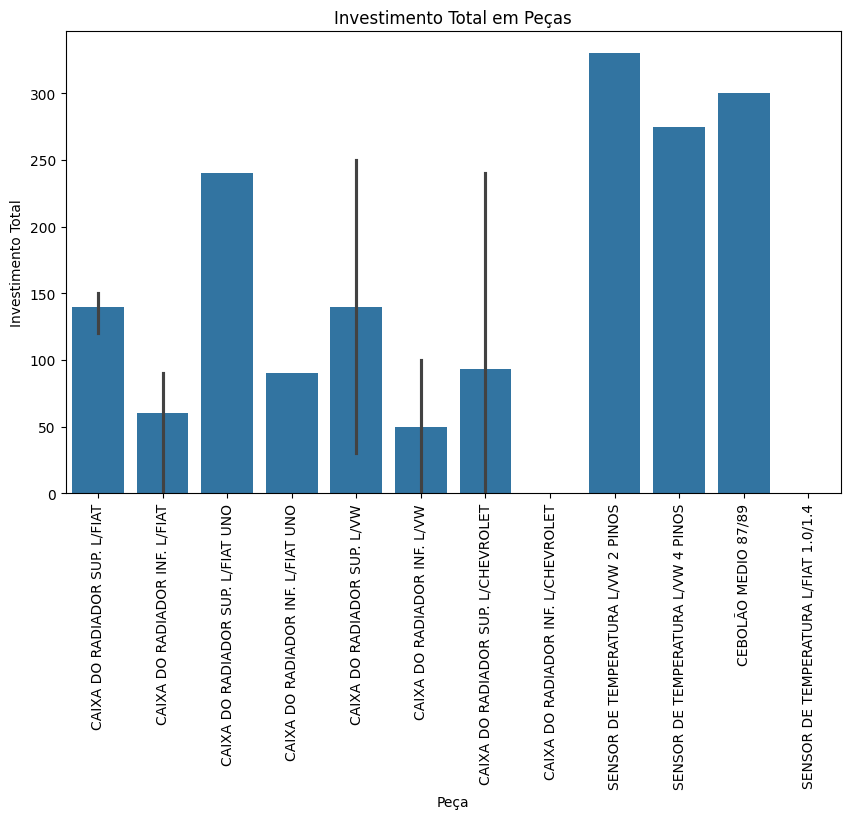

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisar investimento total
plt.figure(figsize=(10, 6))
sns.barplot(x='Peças', y='Investimento_total', data=df_estoque)
plt.title('Investimento Total em Peças')
plt.xlabel('Peça')
plt.ylabel('Investimento Total')
plt.xticks(rotation=90)  # Ajusta a rotação dos rótulos do eixo x
plt.show()


# ***Variação de Preços***

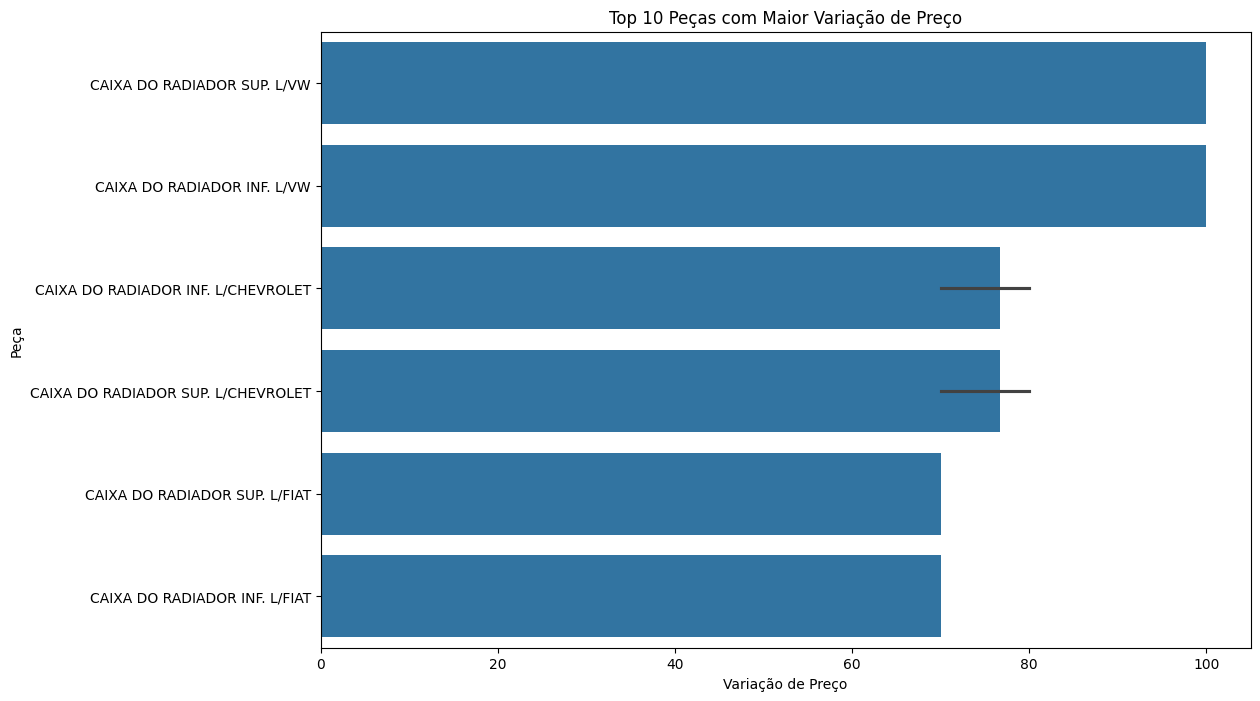

In [91]:
# Calcular variação de preços
df_estoque['Variação_Preço'] = df_estoque['Preço_Unitário_fin'] - df_estoque['Preço_Unitário_in']

# Variação de preços
plt.figure(figsize=(12, 8))
sns.barplot(x='Variação_Preço', y='Peças', data=df_estoque.sort_values(by='Variação_Preço', ascending=False).head(10))
plt.title('Top 10 Peças com Maior Variação de Preço')
plt.xlabel('Variação de Preço')
plt.ylabel('Peça')
plt.show()


# **3. PENDÊNCIAS**

# ***Análise de Pendências por Tipo de Descrição***

In [92]:
# Total de pendências por descrição
pendencias_por_descricao = df_pendencias.groupby('Descrição')['Valor'].sum()

print("\nTotal de Pendências por Descrição:")
print(pendencias_por_descricao)



Total de Pendências por Descrição:
Descrição
FATURAS    8061
Name: Valor, dtype: int64


# ***Análise de Pendências por Data de Vencimento***

In [93]:
# Garantir que 'Data de Vencimento' está no formato correto
df_pendencias['Data de Vencimento'] = pd.to_datetime(df_pendencias['Data de Vencimento'])

# Analisar pendências por data de vencimento
pendencias_por_vencimento = df_pendencias.groupby(df_pendencias['Data de Vencimento'].dt.date)['Valor'].sum()

print("\nTotal de Pendências por Data de Vencimento:")
print(pendencias_por_vencimento)



Total de Pendências por Data de Vencimento:
Data de Vencimento
2024-09-15     415
2024-09-20     946
2024-09-22     162
2024-10-15     618
2024-10-20    1317
2024-10-21     184
2024-10-22     162
2024-11-15     780
2024-11-20     983
2024-11-21     130
2024-11-22     160
2024-12-15     850
2024-12-20    1114
2024-12-21      80
2024-12-22     160
Name: Valor, dtype: int64


# ***Pendências por Valor***

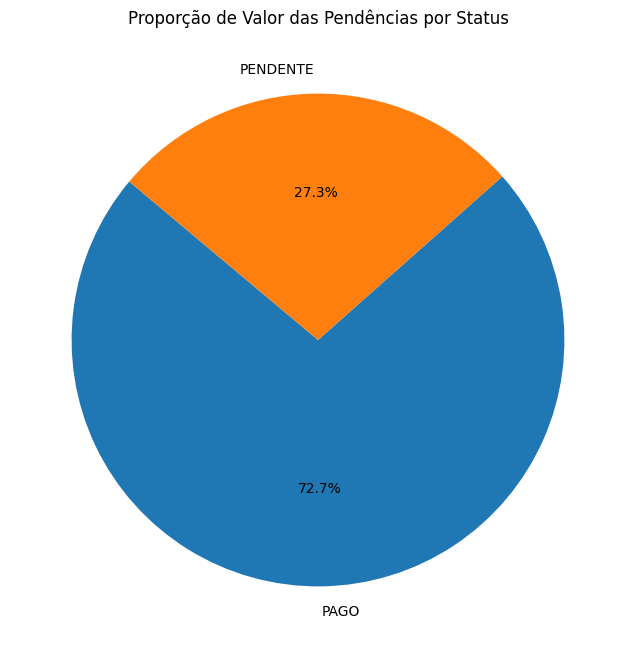

In [94]:
# Analisar valor das pendências
valor_pendencias = df_pendencias.groupby('Status')['Valor'].sum()

plt.figure(figsize=(8, 8))
labels = valor_pendencias.index
sizes = valor_pendencias
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Valor das Pendências por Status')
plt.show()


# ***Pendências por Empresa***

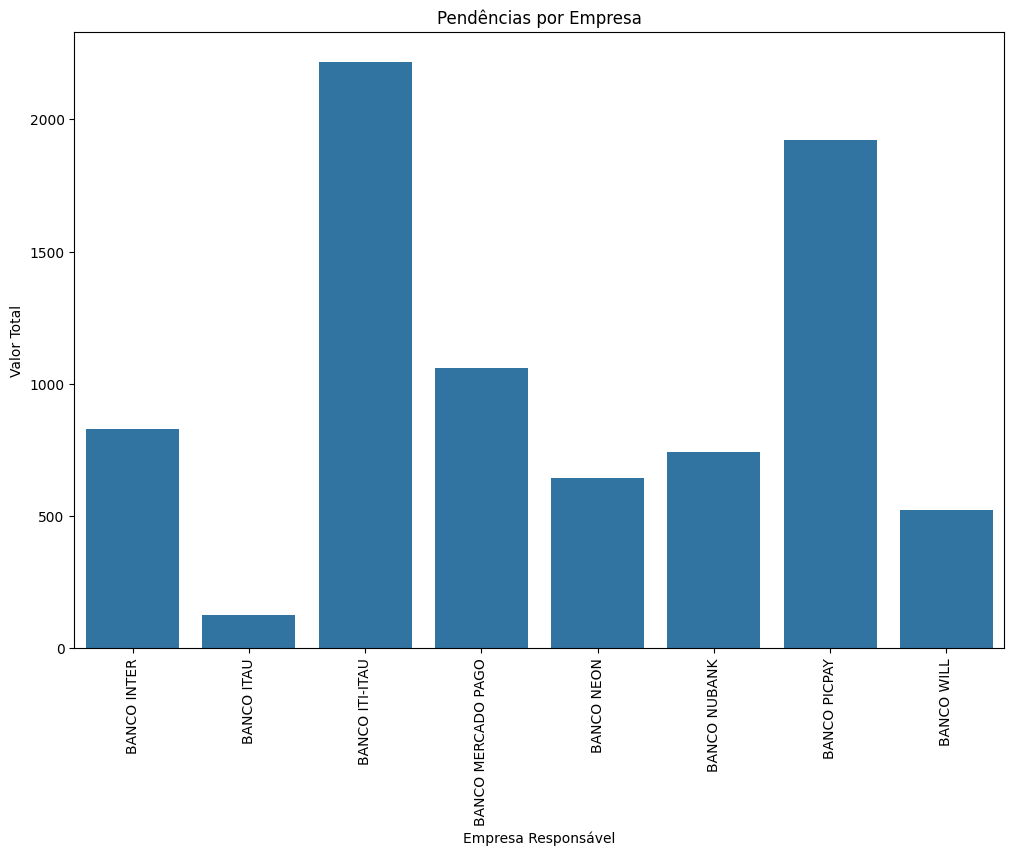

In [95]:
# Analisar pendências por empresa
pendencias_por_empresa = df_pendencias.groupby('Empresa Responsável')['Valor'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Empresa Responsável', y='Valor', data=pendencias_por_empresa)
plt.title('Pendências por Empresa')
plt.xlabel('Empresa Responsável')
plt.ylabel('Valor Total')
plt.xticks(rotation=90)
plt.show()


# **4. FORNECEDORES**

# ***Análise de Contatos***

# ***Análise de Fornecedores por Endereço***

In [ ]:
# Contagem de fornecedores por endereço
fornecedores_por_endereco = df_fornecedores['Endereço'].value_counts()

print("\nNúmero de Fornecedores por Endereço:")
print(fornecedores_por_endereco)



Número de Fornecedores por Endereço:
Endereço
BELÉM-PA    1
Name: count, dtype: int64


# ***Análise de Contatos por Tipo***

In [ ]:
# Contagem de contatos por tipo
fornecedores_por_contato = df_fornecedores['Contato do Fornecedor'].value_counts()

print("\nNúmero de Fornecedores por Tipo de Contato:")
print(fornecedores_por_contato)



Número de Fornecedores por Tipo de Contato:
Contato do Fornecedor
(91) 98169-0351    1
Name: count, dtype: int64


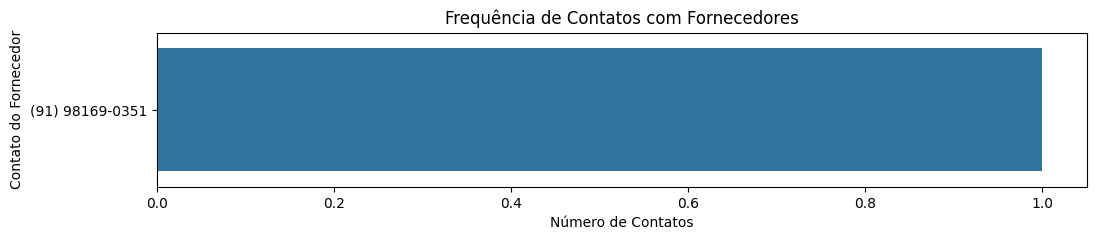

In [ ]:
# Analisar contatos dos fornecedores
plt.figure(figsize=(12, 2))
sns.countplot(y='Contato do Fornecedor', data=df_fornecedores, order=df_fornecedores['Contato do Fornecedor'].value_counts().index)
plt.title('Frequência de Contatos com Fornecedores')
plt.xlabel('Número de Contatos')
plt.ylabel('Contato do Fornecedor')
plt.show()


# **5. DESPESAS**

# ***Total de Despesas***

# ***Análise de Despesas por Categoria***

In [96]:
# Total de despesas por categoria
despesas_por_categoria = df_despesas.groupby('Categoria')['Valor'].sum()

print("\nTotal de Despesas por Categoria:")
print(despesas_por_categoria)



Total de Despesas por Categoria:
Categoria
ALIMENTAÇÃO    1200
ALUGUEL         920
ENERGIA         585
FACULDADE      1080
INTERNET        400
SAÚDE           680
Name: Valor, dtype: int64


# ***Distribuição das Despesas por Categoria***

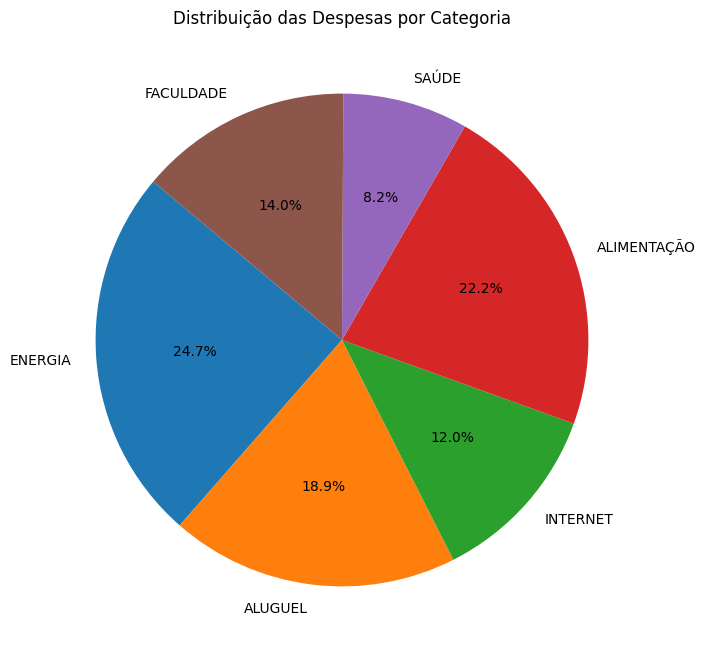

In [97]:
# Total de despesas
plt.figure(figsize=(8, 8))
labels = df_despesas['Categoria'].value_counts().index
sizes = df_despesas.groupby('Categoria')['Valor'].sum()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Despesas por Categoria')
plt.show()


# ***Despesas por Categoria***

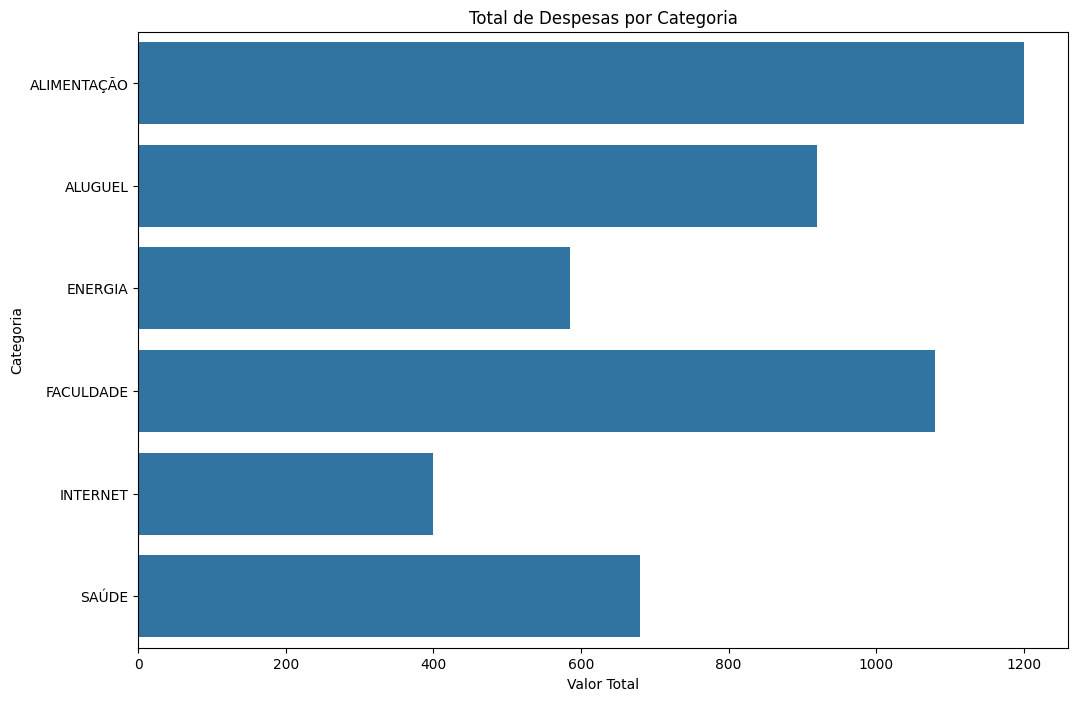

In [98]:
# Despesas por categoria
plt.figure(figsize=(12, 8))
sns.barplot(x='Valor', y='Categoria', data=df_despesas.groupby('Categoria')['Valor'].sum().reset_index())
plt.title('Total de Despesas por Categoria')
plt.xlabel('Valor Total')
plt.ylabel('Categoria')
plt.show()


# ***Análise de Valor e Data***

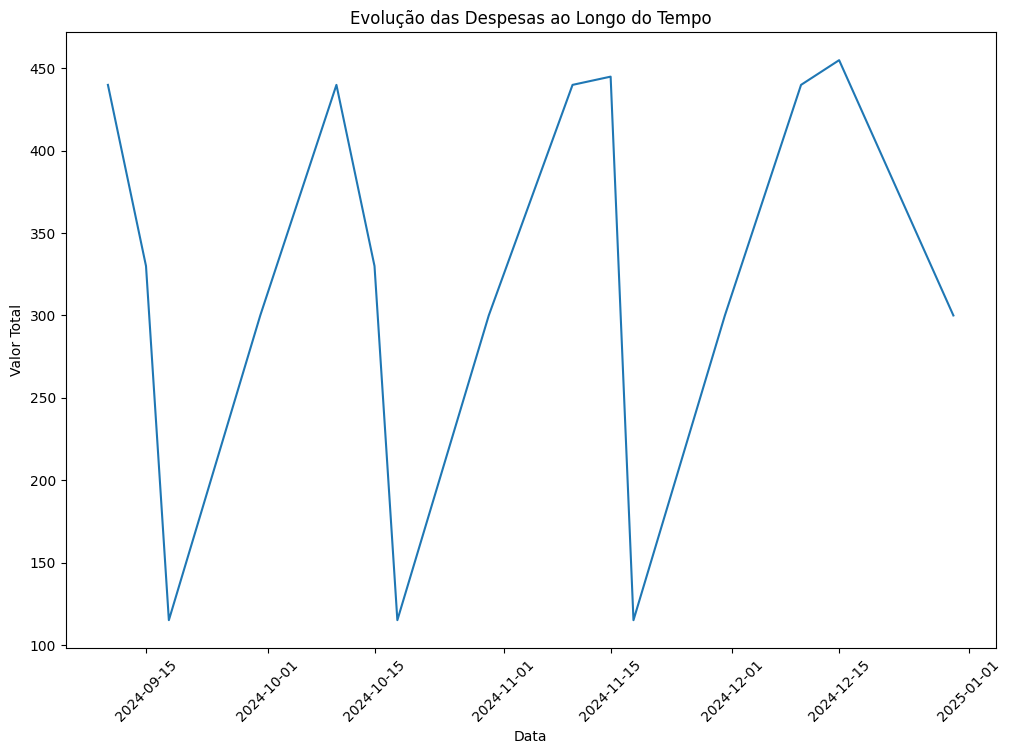

In [99]:
# Garantir que 'Data' é datetime
df_despesas['Data'] = pd.to_datetime(df_despesas['Data'])

# Analisar despesas ao longo do tempo
plt.figure(figsize=(12, 8))
sns.lineplot(x='Data', y='Valor', data=df_despesas.groupby('Data')['Valor'].sum().reset_index())
plt.title('Evolução das Despesas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()


# **1. Algoritmos de Projeção**

# ***1.2. Projeção de Lucro (Estoque)***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



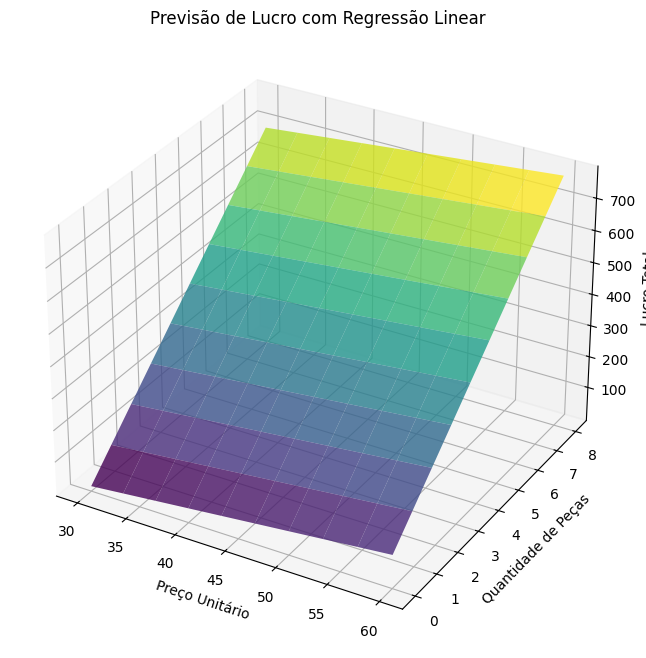

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS (1).xlsx'
df_estoque = pd.read_excel(file_path, sheet_name='Estoque')

# Preparar dados para a regressão
X = df_estoque[['Preço_Unitário_in', 'Quantidade_Peças']]
y = df_estoque['Lucro_Total']

# Ajustar o modelo
model = LinearRegression()
model.fit(X, y)

# Criar uma grade de valores para o gráfico
import numpy as np

preco_unitario_range = np.linspace(df_estoque['Preço_Unitário_in'].min(), df_estoque['Preço_Unitário_in'].max(), 10)
quantidade_range = np.linspace(df_estoque['Quantidade_Peças'].min(), df_estoque['Quantidade_Peças'].max(), 10)
preco_unitario_grid, quantidade_grid = np.meshgrid(preco_unitario_range, quantidade_range)
X_grid = np.column_stack([preco_unitario_grid.ravel(), quantidade_grid.ravel()])

# Prever o lucro para a grade de valores
lucro_previsto = model.predict(X_grid).reshape(preco_unitario_grid.shape)

# Criar gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(preco_unitario_grid, quantidade_grid, lucro_previsto, cmap='viridis', alpha=0.8)
ax.set_xlabel('Preço Unitário')
ax.set_ylabel('Quantidade de Peças')
ax.set_zlabel('Lucro Total')
ax.set_title('Previsão de Lucro com Regressão Linear')

plt.show()


# ***1.3. Projeção de Despesas (Despesas)***


Previsão de Despesas para Novas Categorias:
[-5.68434189e-14]


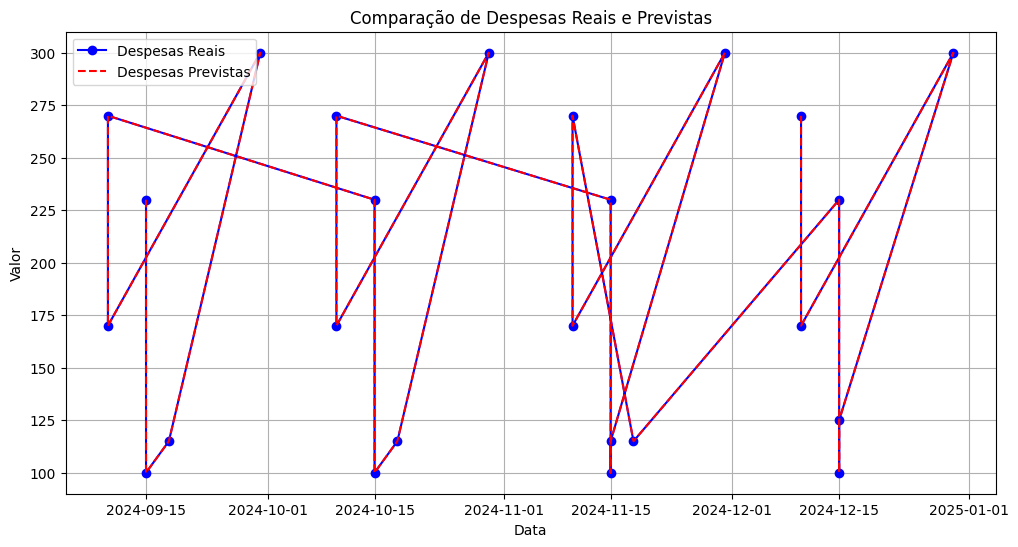

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar os dados
file_path = '/content/VINIX_FINANÇAS (1).xlsx'
df_despesas = pd.read_excel(file_path, sheet_name='Despesas')

# Codificar variáveis categóricas
df_despesas_encoded = pd.get_dummies(df_despesas[['Categoria', 'Valor']], drop_first=True)

# Preparar dados para a regressão
X = df_despesas_encoded
y = df_despesas['Valor']

# Ajustar o modelo
model = LinearRegression()
model.fit(X, y)

# Preparar novas categorias para previsão
novas_categorias = pd.DataFrame({
    'Alimentação': [1],  # Exemplo com uma nova entrada
    'Saúde': [0]        # Adapte as categorias conforme o necessário
})

# Certifique-se de que as colunas estejam na mesma ordem
novas_categorias = novas_categorias.reindex(columns=X.columns, fill_value=0)

# Prever despesas
previsao_despesas = model.predict(novas_categorias)
print("\nPrevisão de Despesas para Novas Categorias:")
print(previsao_despesas)
# Adicionar a previsão ao DataFrame original para comparação
df_despesas['Previsao'] = model.predict(X)

# Plotar despesas reais vs. previstas
plt.figure(figsize=(12, 6))

# Gráfico de despesas reais
plt.plot(df_despesas['Data'], df_despesas['Valor'], label='Despesas Reais', color='blue', marker='o')

# Gráfico de despesas previstas
plt.plot(df_despesas['Data'], df_despesas['Previsao'], label='Despesas Previstas', color='red', linestyle='--')

# Adicionar legendas e títulos
plt.title('Comparação de Despesas Reais e Previstas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()
